# **<div align="center">EDA FOR BINANCE COIN </div>**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
def split_train_test(df: pd.DataFrame, threshold: float = 0.8):

    '''
    Split datasets in X_train, y_train, X_test and y_test

    Parameters:
    df (pd.DataFrame): a dataframe
    threshold: the percentage of original data intended for train subdataset. By default, 80% of data are inteded fir train subset

    Returns:
    Four pd.DataFrame
    '''
    
    lengt_df = df.shape[0]
    threshold_df = round(lengt_df*threshold)

    train = df.iloc[: threshold_df]
    test = df.iloc[threshold_df :]


    return train, test

In [4]:
def time_plots(df: pd.DataFrame, features: list = [None]) -> None:

    '''
    Display subplot of temporal variables.

    Parameter:
        - df: pd.DataFrame
        - features: a list. By default: None

    Returns:
        - None
    '''
    fig, ax = plt.subplots(len(features), 1, figsize = (10, 6), sharex = True) #sharex = True is for sahering 
    # x axis

    for i, var in enumerate(features):
        ax[i].plot(train['date'], train[var], label = var)
        ax[i].legend(loc = "upper right")
        ax[i].set_ylabel(var)

    # for the last subplot
    ax[-1].set_xlabel("Date")

    plt.tight_layout() # Avoid overlapping
    plt.show()

In [5]:
def matrix_correlation(df: pd.DataFrame, features: list = [None]) -> None:

    '''
    Display a correlation matrix.

    Parameters:
        - df: pd.DataFrame
        - features: a list. By default: None

    Returns:
        - None
    '''
    corr_matrix = df[features].corr()

    plt.figure(figsize=(6,4))
    sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    plt.title("Correlation matrix")
    plt.show()

In [6]:
def scatter_matrix(df: pd.DataFrame, features: list = None) -> None:
    '''
    Display distribution of a feature and scatter plots between features.

    Parameters:
        - df: pd.DataFrame
        - features: a list. By default: None

    Returns:
        - None
    '''
    if features is None:
        features = ['price_usd', 'market_cap', 'volume']

    sns.pairplot(df[features], diag_kind="kde", corner=True)
    plt.suptitle("Relaciones entre Price, Market Cap y Volume", y=1.02)
    plt.show()

In [7]:
def decompose_time_series(df: pd.DataFrame, column: str, model: str = "multiplicative", 
                          freq: int = None) -> None:
    '''
    Decompose a temporal serie in tendency, seasional and residuals.
    
    Parameters:
        - df: a Dataframe with a datetime index
        - columns: name of the feature for analysing
        - model: 'additive' or 'multiplicative'. 
            - Additive: tendency and seasonality don't depend on the level of the serie (the value)
                Serie = Tendency + Seasonality + Residuals
            - Multiplicative: tendency ans seasonality depends on the level of teh series (the value)
                Serie = Tendency * Seasonality * Residuals
        - freq: periodicity. By deafault: None. If you want a week: 7. A month: 30

    Returns:
        - None
    '''
    # asegurarse de que el índice es datetime
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("El DataFrame debe tener un DatetimeIndex.")

    decomposition = seasonal_decompose(df[column], model=model, period=freq)

    fig = decomposition.plot()
    fig.set_size_inches(10, 8)
    plt.suptitle(f"Descomposición de la serie: {column}", fontsize=14)
    plt.show()


In [8]:
def returns_and_volatility(df: pd.DataFrame, price_col: str = "price_usd", window: int = 7) -> pd.DataFrame:

    '''
    Calculate daily returns (%) and mobile volatibility from a price serie
    
    Paremeters:
        - df: DataFrame con datetime index
        - price_col: name of the column with the price. By default: price_usd
        - window: windows size for volatility (unids: days). By default: 7 days
    
    Returns:
        - DataFrame con nuevas columnas ['returns', 'volatility']
    '''
    
    # Aseguramos orden temporal
    df = df.sort_index().copy()
    
    # Retornos diarios (%)
    df['returns'] = df[price_col].pct_change() * 100
    
    # Volatilidad móvil (rolling std de retornos)
    df['volatility'] = df['returns'].rolling(window=window).std()
    
    # Gráficos
    plt.figure(figsize=(12,6))
    
    # Retornos
    plt.subplot(2,1,1)
    plt.plot(df.index, df['returns'], color='blue', alpha=0.6)
    plt.title(f"Retornos diarios (%) - {price_col}")
    plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
    
    # Volatilidad
    plt.subplot(2,1,2)
    plt.plot(df.index, df['volatility'], color='red')
    plt.title(f"Volatilidad móvil ({window} días)")
    
    plt.tight_layout()
    plt.show()
    
    return df

## **Import dataset**

In [9]:
binance = pd.read_csv("../data/processed/binance_cleared.csv")
binance['date'] = pd.to_datetime(binance['date'])
binance = binance.set_index('date', drop=False).sort_index()
binance.head()

,date,price_usd,market_cap,volume
date,,,,
2025-02-05,2025-02-05,571.030000,8.327533e+10,1.241403e+09
2025-02-06,2025-02-06,580.050000,8.457818e+10,4.711889e+08
2025-02-07,2025-02-07,586.110000,8.556300e+10,1.075487e+09
2025-02-09,2025-02-09,634.258701,8.556300e+10,1.075487e+09
2025-02-10,2025-02-10,605.280000,8.825810e+10,1.516135e+09


## **Split X_train, y_train, X_test and y_test**

In [10]:
train, test = split_train_test(binance, 0.8)

## **Plots for train dataset**

**Distributions and Correlations**

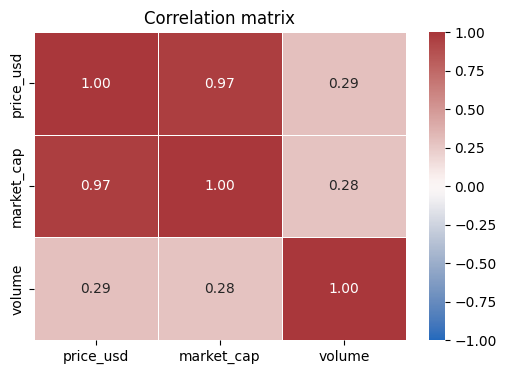

In [11]:
matrix_correlation(train, ['price_usd', 'market_cap', 'volume'])

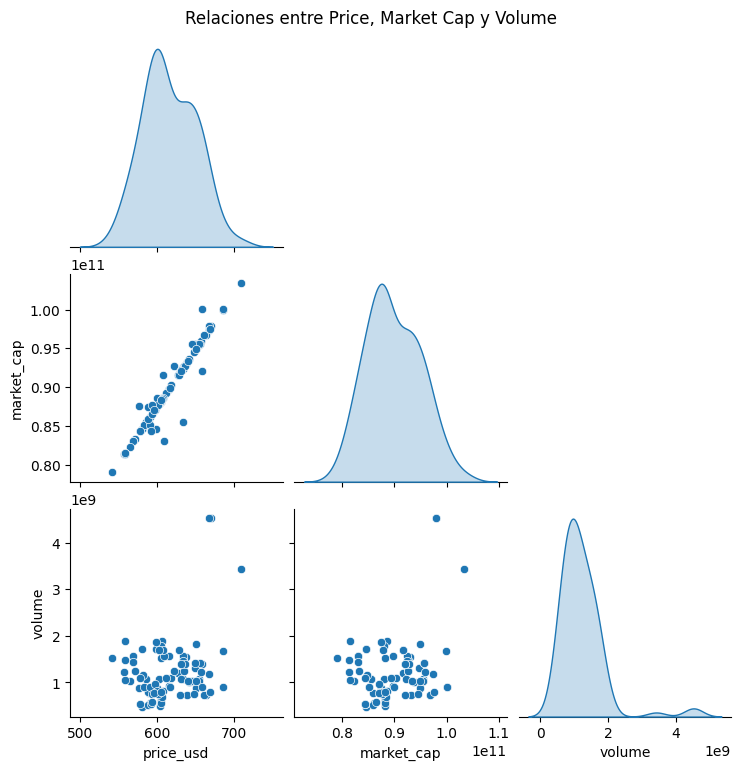

In [12]:
scatter_matrix(train, ['price_usd', 'market_cap', 'volume'])

**Time plots**

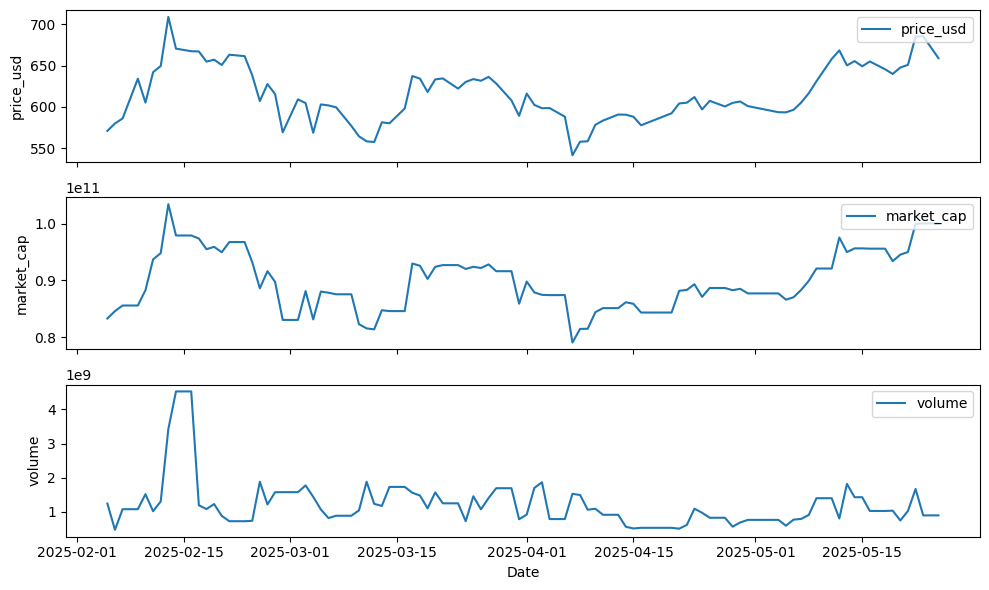

In [13]:
time_plots(train, ['price_usd', 'market_cap', 'volume'])

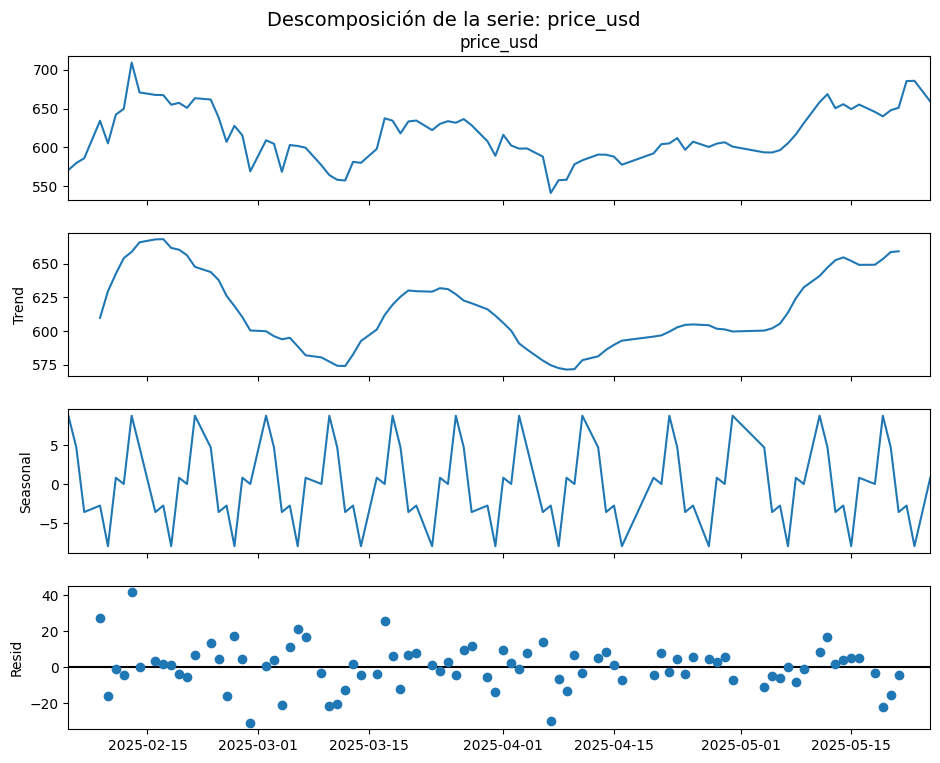

In [14]:
decompose_time_series(train, 'price_usd', 'additive', freq = 7)

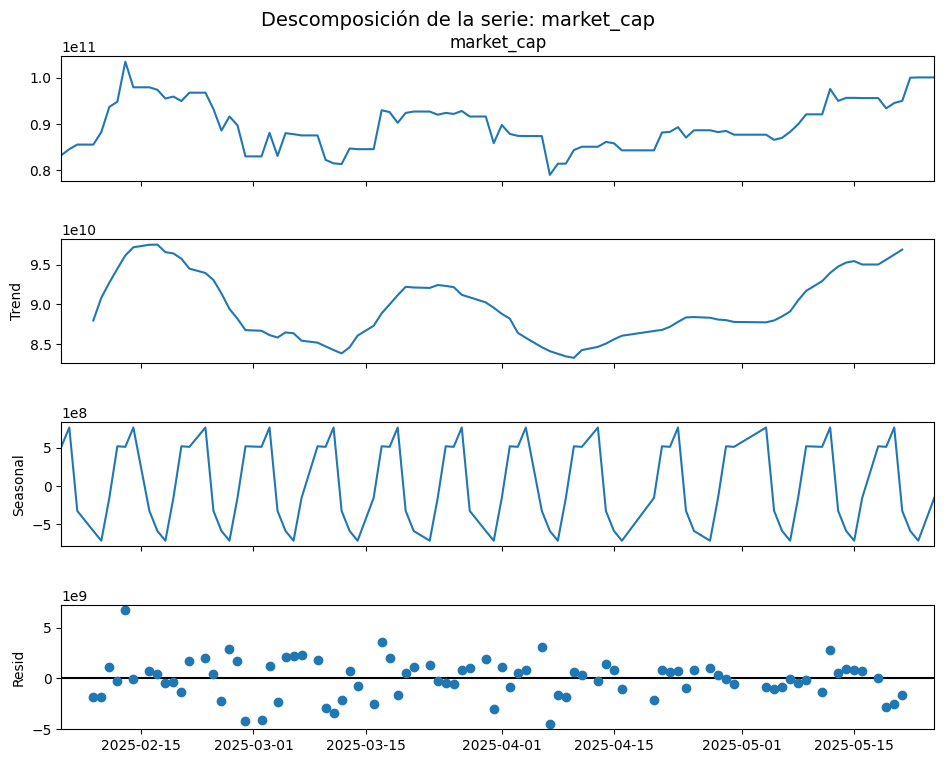

In [15]:
decompose_time_series(train, 'market_cap', 'additive', freq = 7)

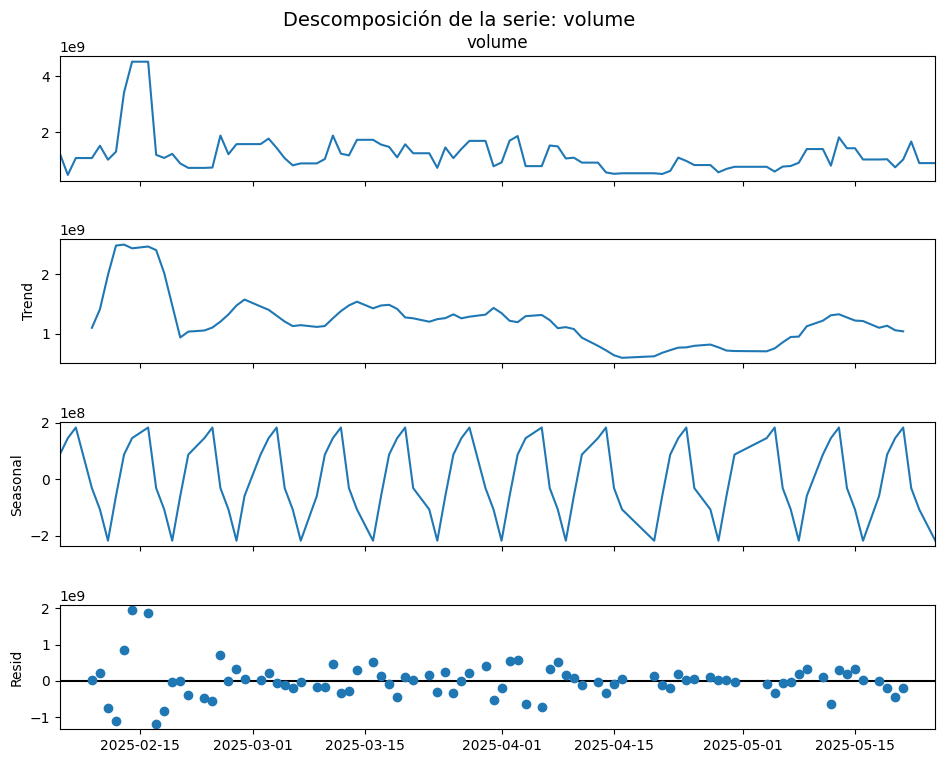

In [16]:
decompose_time_series(train, 'volume', 'additive', freq = 7)

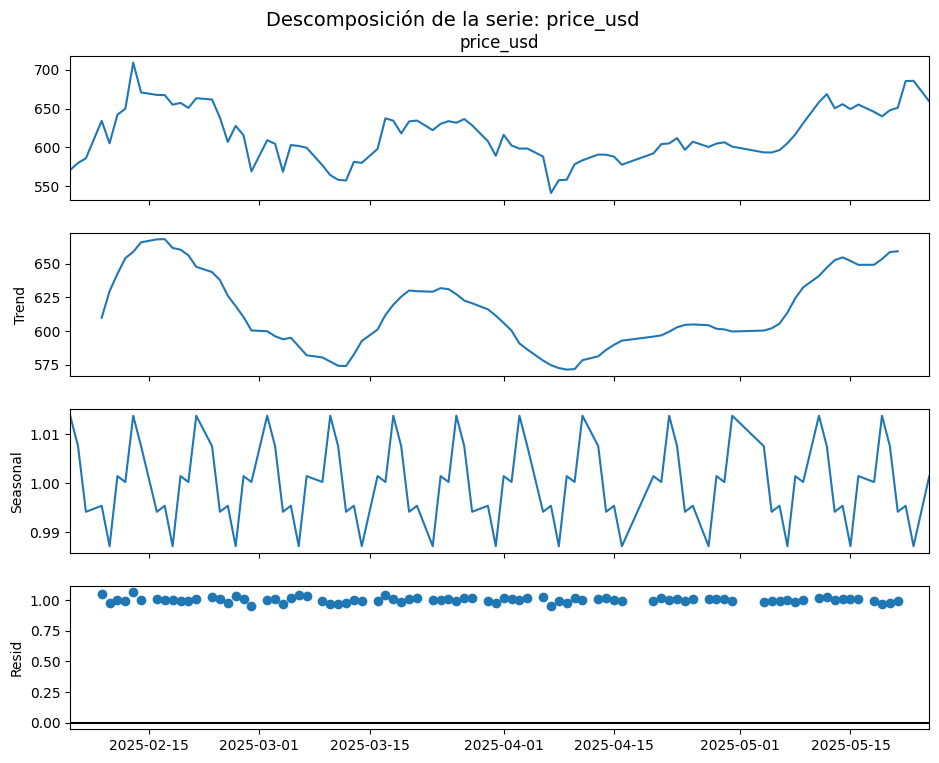

In [30]:
decompose_time_series(train, 'price_usd', 'multiplicative', freq = 7)

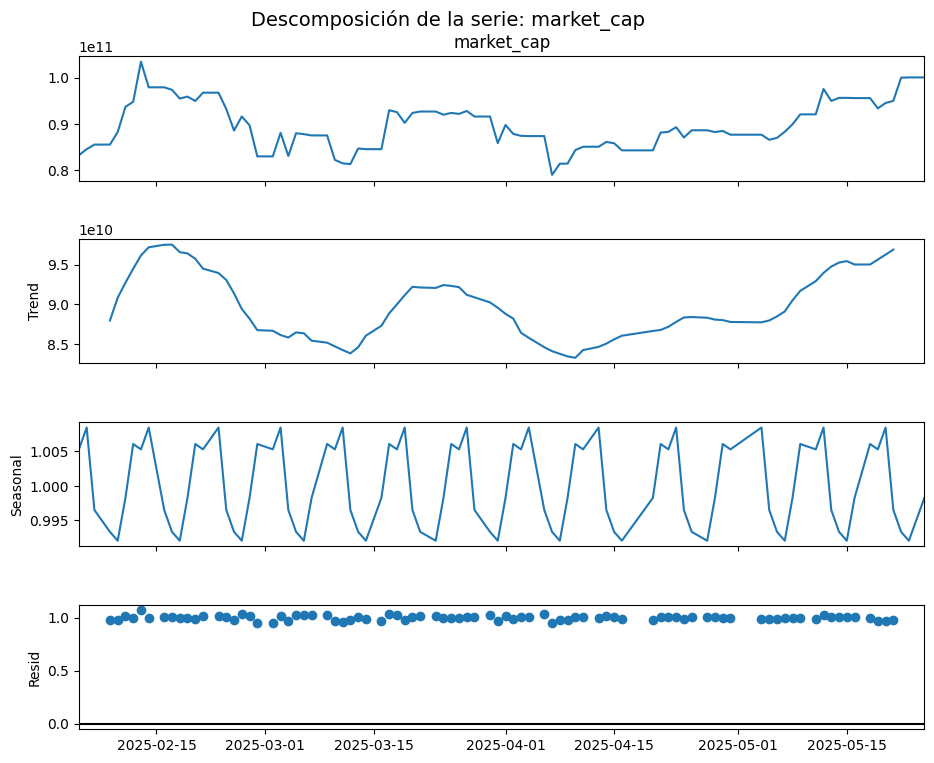

In [18]:
decompose_time_series(train, 'market_cap', 'multiplicative', freq = 7)

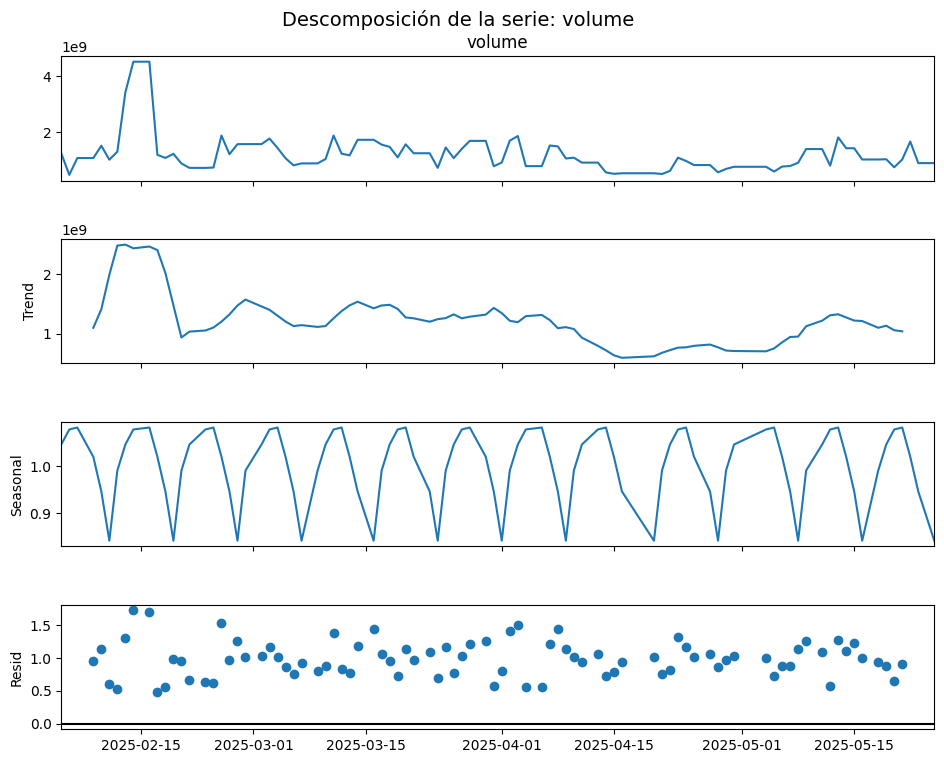

In [19]:
decompose_time_series(train, 'volume', 'multiplicative', freq = 7)

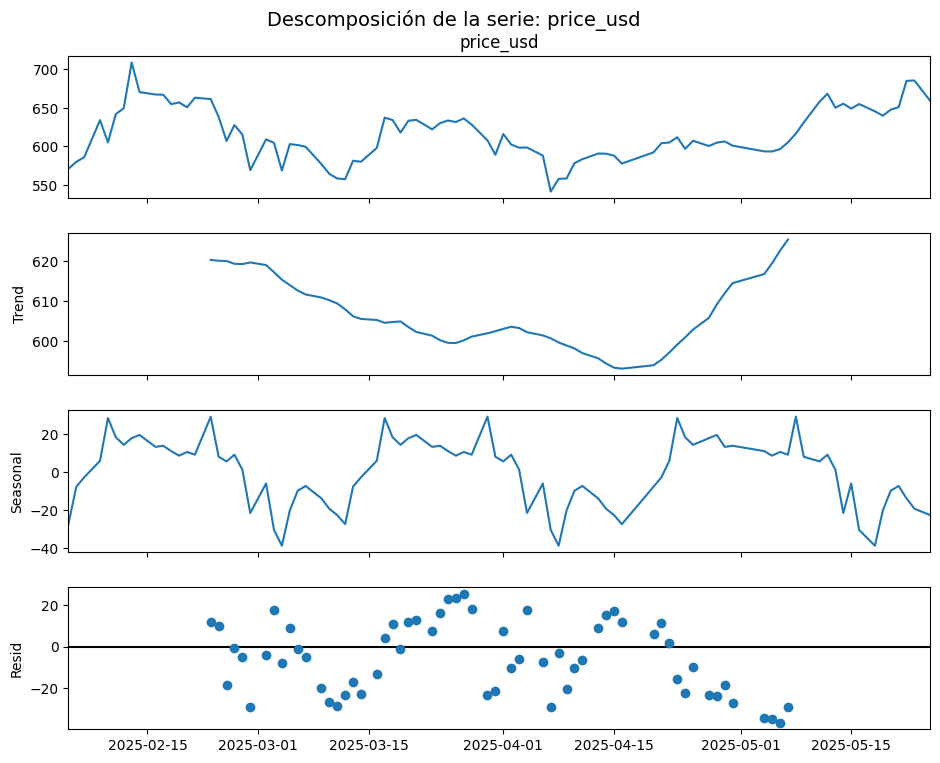

In [20]:
decompose_time_series(train, 'price_usd', 'additive', freq = 30)

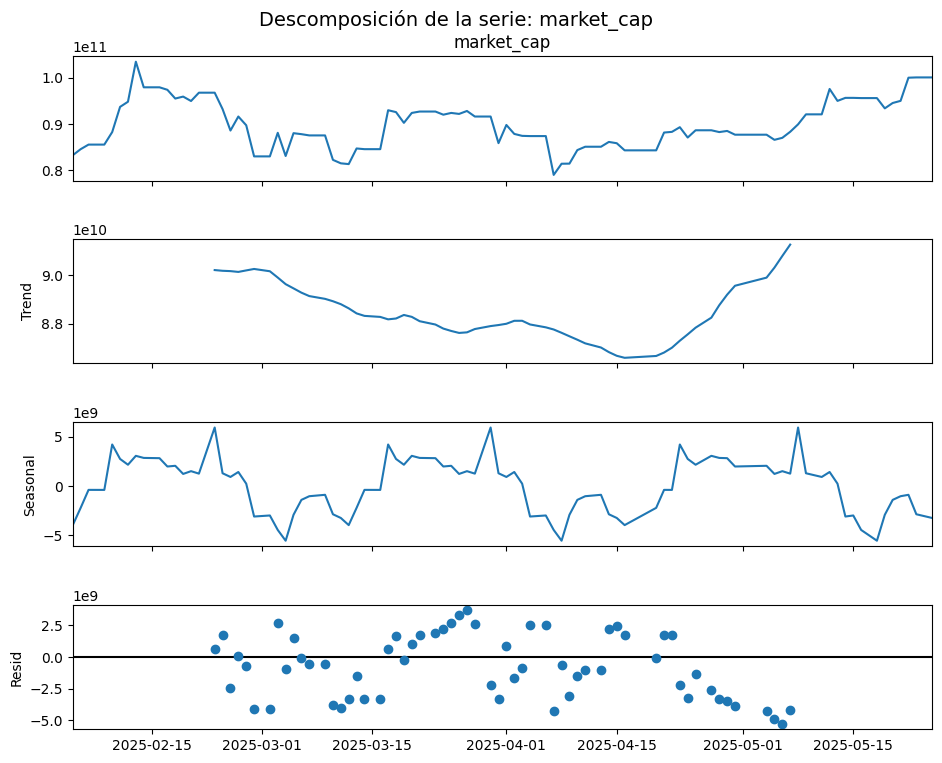

In [21]:
decompose_time_series(train, 'market_cap', 'additive', freq = 30)

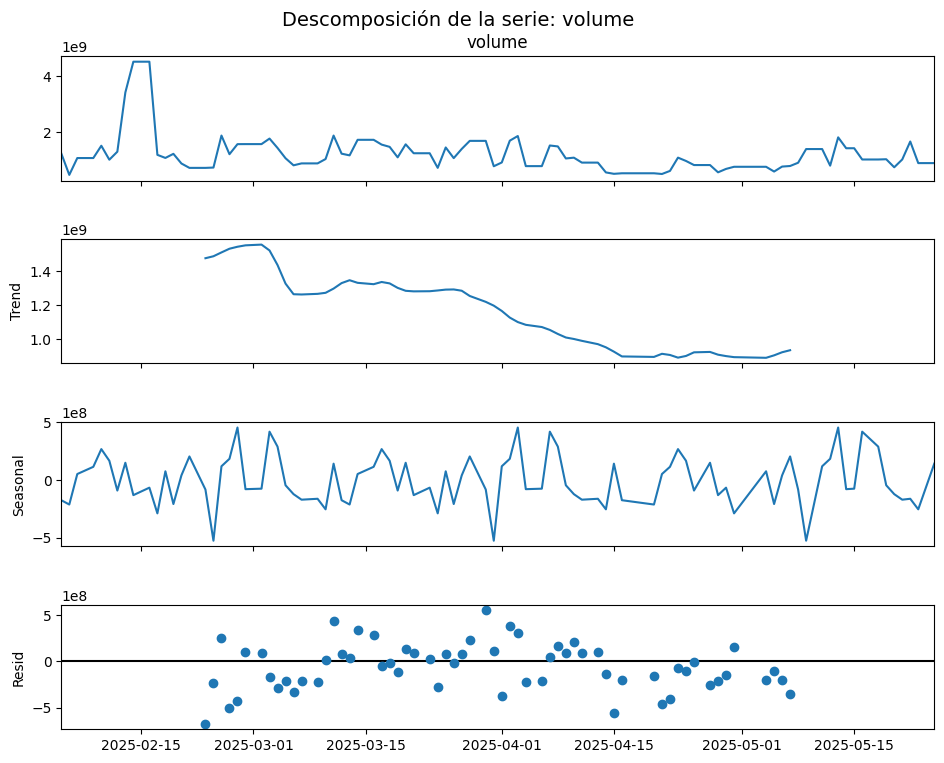

In [22]:
decompose_time_series(train, 'volume', 'additive', freq = 30)

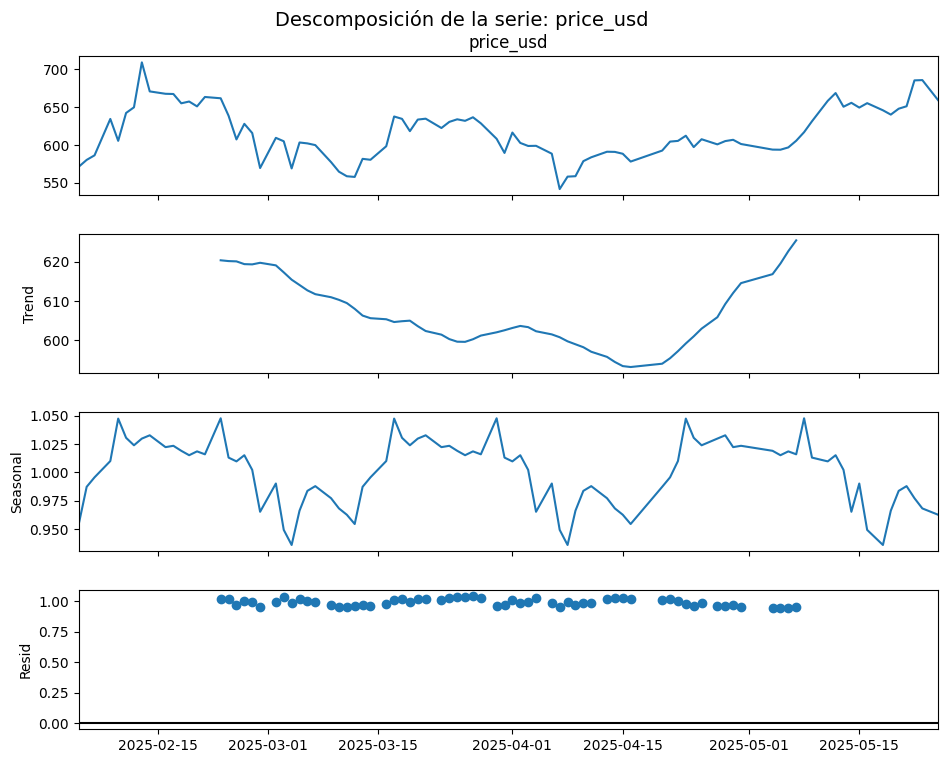

In [23]:
decompose_time_series(train, 'price_usd', 'multiplicative', freq = 30)

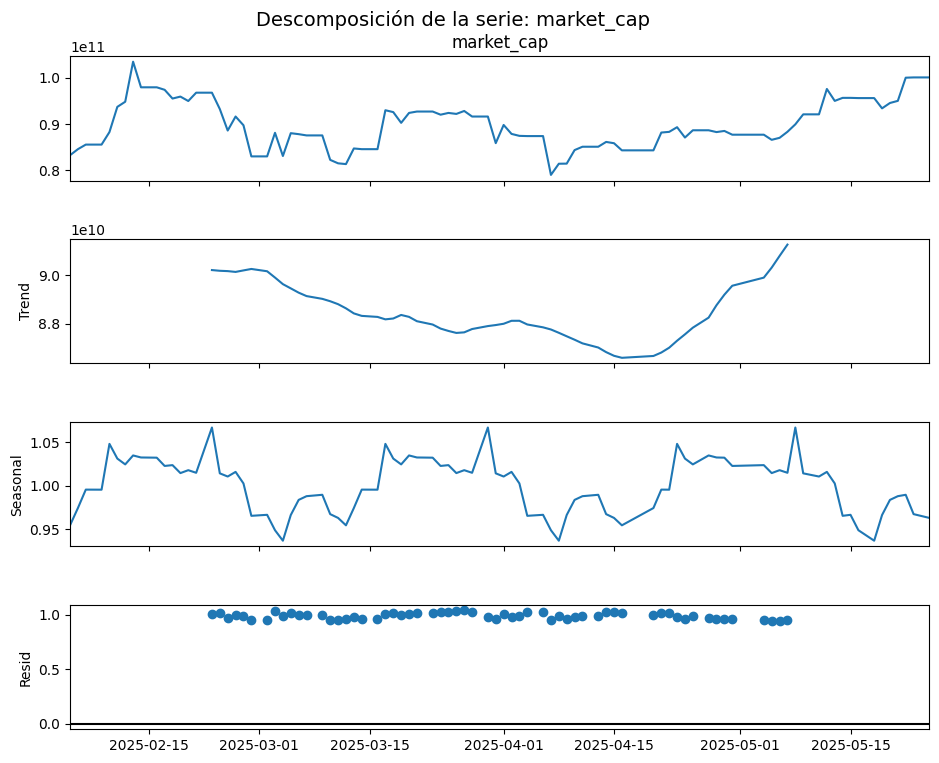

In [24]:
decompose_time_series(train, 'market_cap', 'multiplicative', freq = 30)

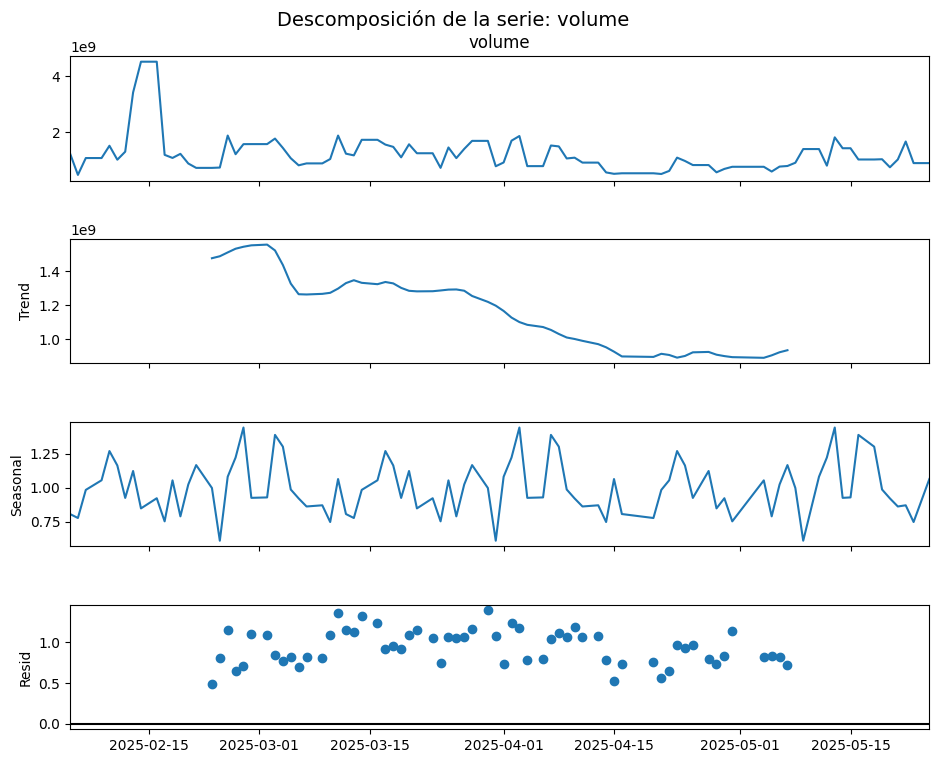

In [25]:
decompose_time_series(train, 'volume', 'multiplicative', freq = 30)

The best frequency is each 7 days because detect the seasonility. Multiplicative is the best model because residuals don' have any pattern and they are centered in 1.

**Retunrs and volatibility**

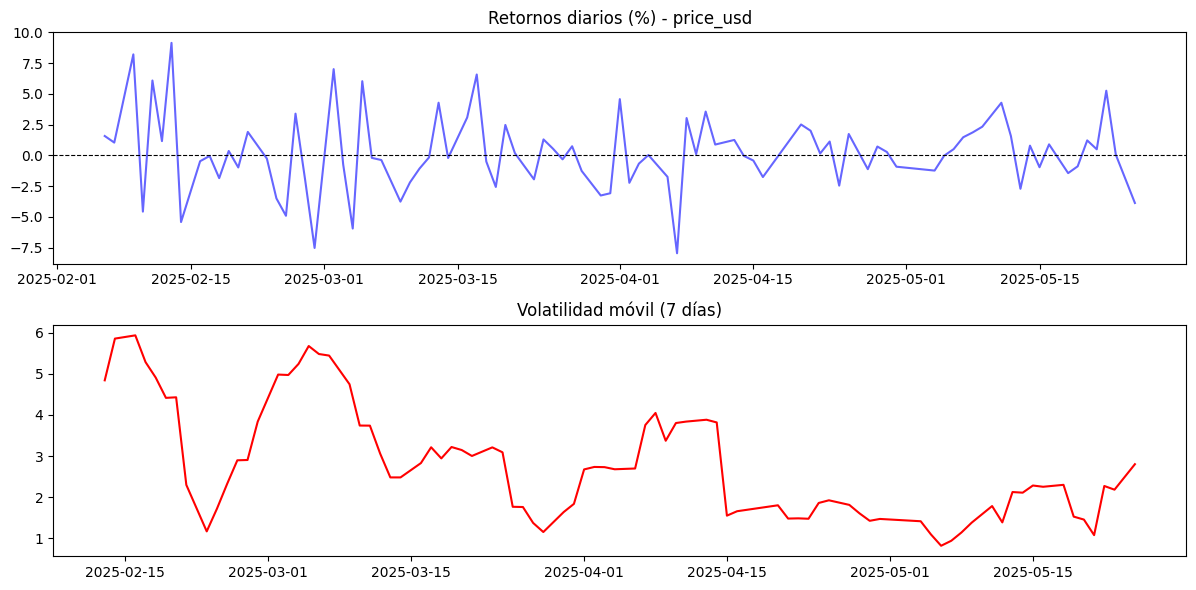

,date,price_usd,market_cap,volume,returns,volatility
date,,,,,,
2025-02-05,2025-02-05,571.030000,8.327533e+10,1.241403e+09,NaN,NaN
2025-02-06,2025-02-06,580.050000,8.457818e+10,4.711889e+08,1.579602,NaN
2025-02-07,2025-02-07,586.110000,8.556300e+10,1.075487e+09,1.044738,NaN
2025-02-09,2025-02-09,634.258701,8.556300e+10,1.075487e+09,8.214960,NaN
2025-02-10,2025-02-10,605.280000,8.825810e+10,1.516135e+09,-4.568909,NaN
...,...,...,...,...,...,...
2025-05-20,2025-05-20,647.790000,9.451482e+10,7.442758e+08,1.221932,1.455630
2025-05-21,2025-05-21,651.020000,9.497597e+10,1.024253e+09,0.498618,1.077063
2025-05-22,2025-05-22,685.270000,9.996196e+10,1.667840e+09,5.260975,2.272697


In [26]:
returns_and_volatility(train)